# Context:
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# Objective
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

# Key Questions
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

### Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [312]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [313]:
df = pd.read_excel('Credit Card Customer Data.xlsx')

In [314]:
df.shape

(660, 7)

In [315]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [317]:
print("Null in any column? ", df.isnull().values.any())

Null in any column?  False


In [318]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


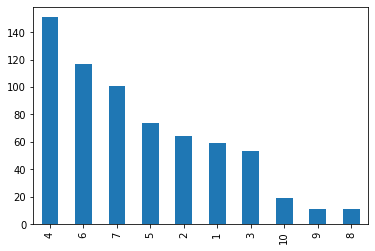

In [319]:
pd.value_counts(df["Total_Credit_Cards"]).plot(kind="bar")

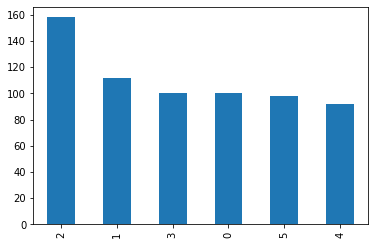

In [320]:
pd.value_counts(df["Total_visits_bank"]).plot(kind="bar")

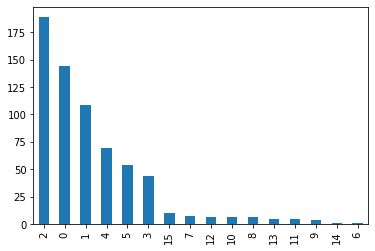

In [321]:
pd.value_counts(df["Total_visits_online"]).plot(kind="bar")

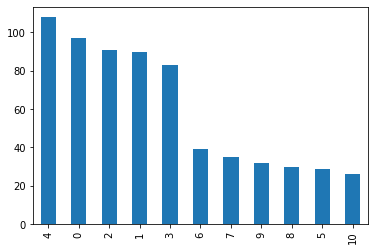

In [322]:
pd.value_counts(df["Total_calls_made"]).plot(kind="bar")

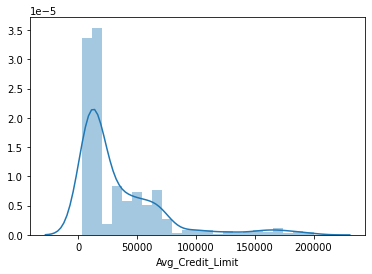

In [323]:
sns.distplot(df['Avg_Credit_Limit'])

In [324]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [325]:
# Online visit and bank visits are relatively similar in numbers, which doesn't look right!
# Average credit card customer has around 4 to 5.
# Average credit limit is around 34k
# Most customer has credit limit in the range of 10k to 50k

In [326]:
## Sl_No and Customer Key shouldn't be important since they are just keys for identification
dfn = df.drop(['Sl_No', 'Customer Key'], axis=1)

In [327]:
dfn.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [328]:
dfn.shape

(660, 5)

### KDE plot for all the features to see how many of it can show separate clusters.

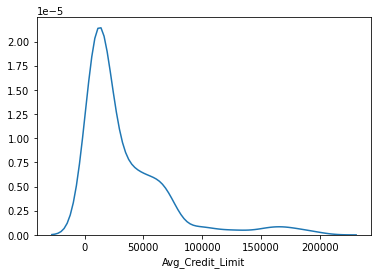

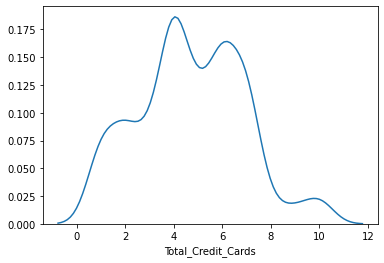

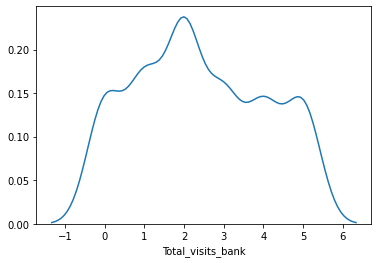

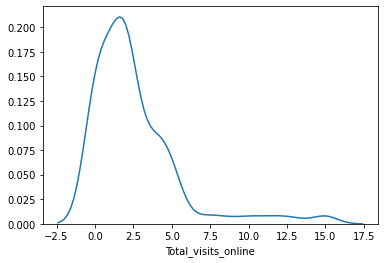

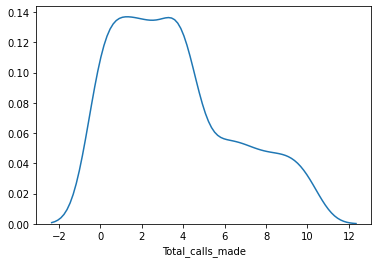

In [329]:
for i in dfn.columns[dfn.columns!='class']:
    sns.distplot(dfn[i],hist=False,)
    plt.show()

In [330]:
cor = dfn.corr()
cor

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


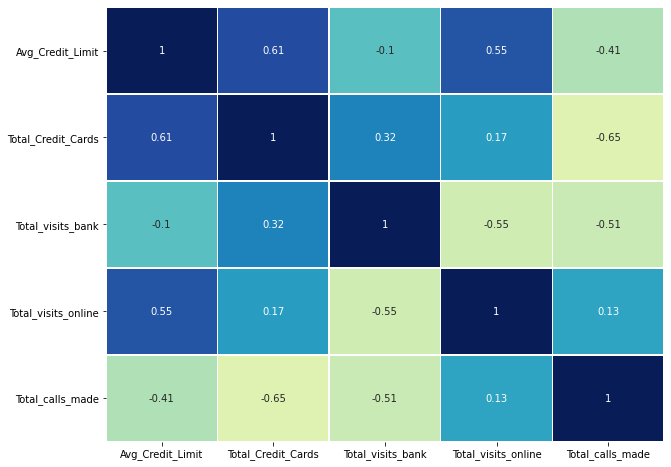

In [331]:
plt.figure(figsize=(10,8))

sns.heatmap(dfn.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [332]:
# total credit cards and total calls made have high correlation
# credit limit and total calls made have high correlation
# credit limit and total cards have high correlation

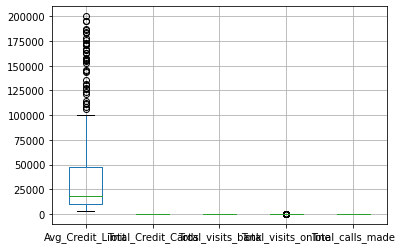

In [333]:
dfn.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb6301d3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb6301ddd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb63015e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7feb63023850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feb63023d50>],
 'means': []}

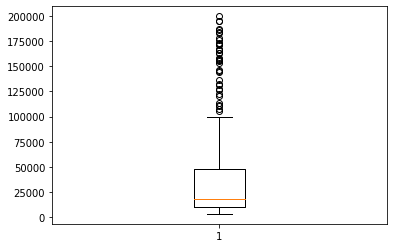

In [334]:
plt.boxplot(dfn['Avg_Credit_Limit'])

In [335]:
# these are outliers of high credit limit, most of them has more than 8 credit cards
ot = dfn[dfn["Avg_Credit_Limit"]>90000]
ot

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
4,100000,6,0,12,3
6,100000,5,0,11,2
612,157000,9,1,14,1
613,94000,9,1,11,0
614,163000,8,1,7,1
615,131000,9,1,10,1
616,96000,10,1,11,2
617,136000,8,0,13,0
618,121000,7,0,13,2


In [336]:
ot.Total_Credit_Cards.mean()

8.571428571428571

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb631e56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb63132190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb631e50d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feb63132c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feb6313b190>],
 'means': []}

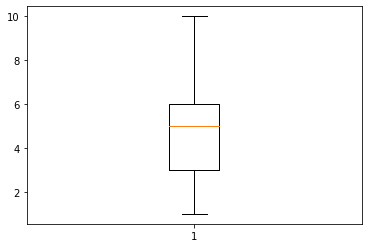

In [337]:
plt.boxplot(dfn['Total_Credit_Cards'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb6326bc90>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb6326f750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb6326b6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feb63278250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feb63278790>],
 'means': []}

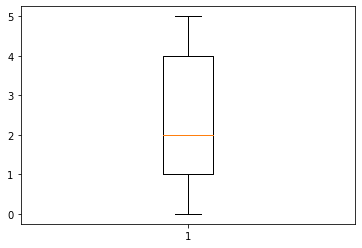

In [338]:
plt.boxplot(dfn['Total_visits_bank'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb6336b990>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb63370450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb6336b3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feb63370f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feb63376490>],
 'means': []}

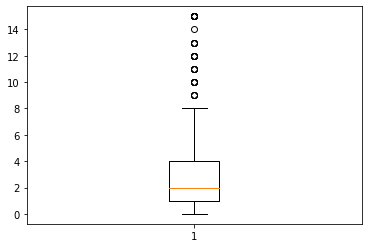

In [339]:
plt.boxplot(dfn['Total_visits_online'])

In [340]:
# there are some outliers here as well for online visits greater than 8
# these also look like to have high avg. credit limit
ot = dfn[dfn["Total_visits_online"]>8]
ot

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
4,100000,6,0,12,3
6,100000,5,0,11,2
612,157000,9,1,14,1
613,94000,9,1,11,0
615,131000,9,1,10,1
616,96000,10,1,11,2
617,136000,8,0,13,0
618,121000,7,0,13,2
619,158000,7,0,13,0


In [341]:
ot.shape

(37, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7feb6342d5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb63433090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feb634def90>],
 'medians': [<matplotlib.lines.Line2D at 0x7feb63433b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feb6343c090>],
 'means': []}

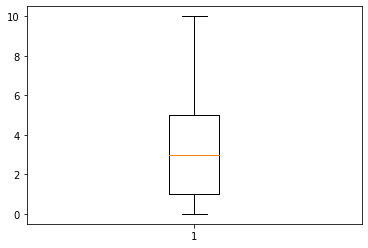

In [342]:
plt.boxplot(dfn['Total_calls_made'])

In [343]:
# Let us take logaritmic transform for avg_credit_limit to remove outliers
dfn['Avg_Credit_Limit'] = np.log(dfn['Avg_Credit_Limit'])
#dfn['Total_visits_online'] = np.log(dfn['Total_visits_online'])

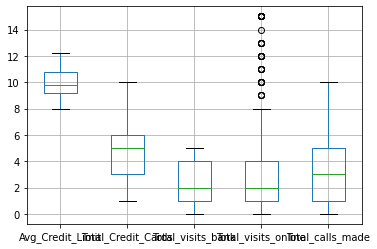

In [344]:
dfn.boxplot()

In [345]:
dfn.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,11.512925,2,1,1,0
1,10.819778,3,0,10,9
2,10.819778,7,1,3,4
3,10.308953,5,1,1,4
4,11.512925,6,0,12,3


In [346]:
dfn.dtypes

Avg_Credit_Limit       float64
Total_Credit_Cards       int64
Total_visits_bank        int64
Total_visits_online      int64
Total_calls_made         int64
dtype: object

### Apply Scaling

In [347]:
# This looks better.
# Now let us try to scale the variables
from scipy.stats import zscore

numeric_cols = dfn.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
dfn[numeric_cols] = dfn[numeric_cols].apply(zscore)

In [348]:
dfn.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537
1,0.885387,-0.787585,-1.473731,2.520519,1.891859
2,0.885387,1.058973,-0.860451,0.134290,0.145528
3,0.336281,0.135694,-0.860451,-0.547490,0.145528
4,1.630478,0.597334,-1.473731,3.202298,-0.203739


### K-means clustering

In [349]:
# Variables are mow scaled. Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(dfn)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,1980.654971
2,3,1090.350994
3,4,860.748318
4,5,775.819909
5,6,697.749557
6,7,634.294627
7,8,598.783735
8,9,572.236489
9,10,543.741398


### Identify clusters

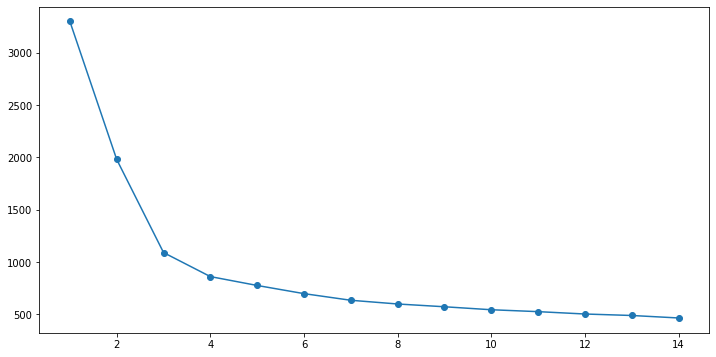

In [350]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [351]:
# We could see the bend at 4, so let us create 4 custers

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(dfn)

KMeans(n_clusters=4, n_init=5, random_state=12345)

In [352]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[219 223 168  50]


In [353]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(dfn) )
centroid_df.transpose()

,0,1,2,3
Avg_Credit_Limit,0.838906,-0.726532,-0.714454,1.966490
Total_Credit_Cards,0.388647,-1.062913,0.350027,1.862226
Total_visits_bank,0.612542,-0.904453,0.731157,-1.105763
Total_visits_online,-0.558386,0.325372,-0.545461,2.827319
Total_calls_made,-0.533867,1.152605,-0.573795,-0.874330


In [354]:
# Add cluster number to original cars data

predictions = kmeans.predict(dfn)
predictions
df["group"] = predictions
df['group'] = df['group'].astype('category')
df.dtypes

Sl_No                     int64
Customer Key              int64
Avg_Credit_Limit          int64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
group                  category
dtype: object

In [355]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,3
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,3
656,657,60732,84000,10,1,13,2,3
657,658,53834,145000,8,1,9,1,3
658,659,80655,172000,10,1,15,0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb636ba250>,
      dtype=object)

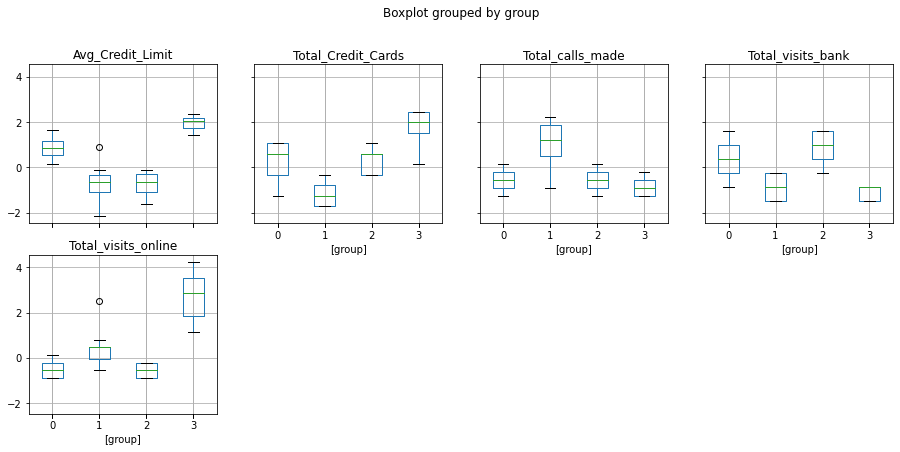

In [356]:
# Visualize the centers

dfn["group"] = predictions
dfn.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [357]:
dfn

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1.630478,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.885387,-0.787585,-1.473731,2.520519,1.891859,1
2,0.885387,1.058973,-0.860451,0.134290,0.145528,0
3,0.336281,0.135694,-0.860451,-0.547490,0.145528,0
4,1.630478,0.597334,-1.473731,3.202298,-0.203739,3
...,...,...,...,...,...,...
655,1.619674,2.443892,-0.860451,2.520519,-1.251537,3
656,1.443058,2.443892,-0.860451,3.543188,-0.553005,3
657,2.029885,1.520613,-0.860451,2.179629,-0.902271,3
658,2.213443,2.443892,-0.860451,4.224968,-1.251537,3


### Heirarchical clustering

In [358]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(dfn),columns=dfn.columns)

In [359]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_std, 'ward', metric='euclidean')
Z.shape

(659, 4)

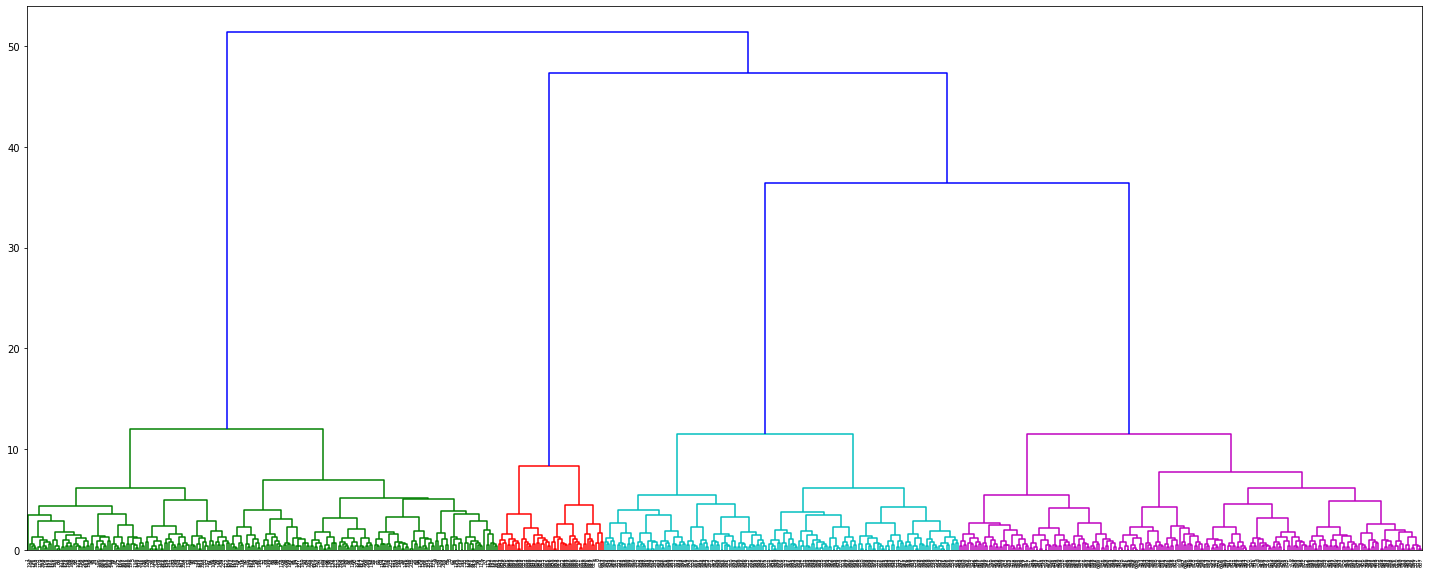

In [360]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

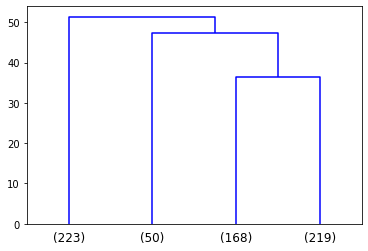

In [361]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

In [362]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=0.9, criterion='distance')
clusters

array([180,  10, 192, 188,  93,  18,  93,  73,  68,  63,  69,  19,  28,
        40,  44,  38,  58,  67,  37,  53,  45,  54,  65,  59,  12,   8,
         1,  31,  41,  64,  70,  51,  11,  56,  25,  57,  26,  54,  22,
        32,  20,  15,  46,  57,  47,  21,  35,  37,  63,  48,   4,  43,
         9,   2,   3,  35,  66,  12,  39,  21,  53,  30,  66,  55,   4,
        61,  54,  34,  31,  27,  27,  34,  49,  50,  38,  50,  27,  70,
        11,  15,  29,  43,  59,  50,  45,  40,  65,  71,   7,  24,  51,
        30,  41,  42,  60,  42,  48,  57,   8,  41,  39,   8,  26,  16,
        30,   6,  62,  33,  34,  20,  47,   3,  22,  71,  55,  33,  16,
        52,  70,   2,  47,   1,  36,   9,  33,  62,  21,  32,  69,  51,
        50,  72,  72,  26,  53,  48,  18,   3,   8,   5,  18,  57,  24,
        70,  24,  57,   6,  44,  31,  15,  32,  61,  48,  64,  25,  61,
        23,  28,  23,  35,  12,  45,  67,   1,  52,   4,  52,  47,   7,
        50,  13,  33,  56,   7,  49,  66,  36,   3,  41,  60,  6

In [363]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(X_std,clusters)

0.2834722845453821

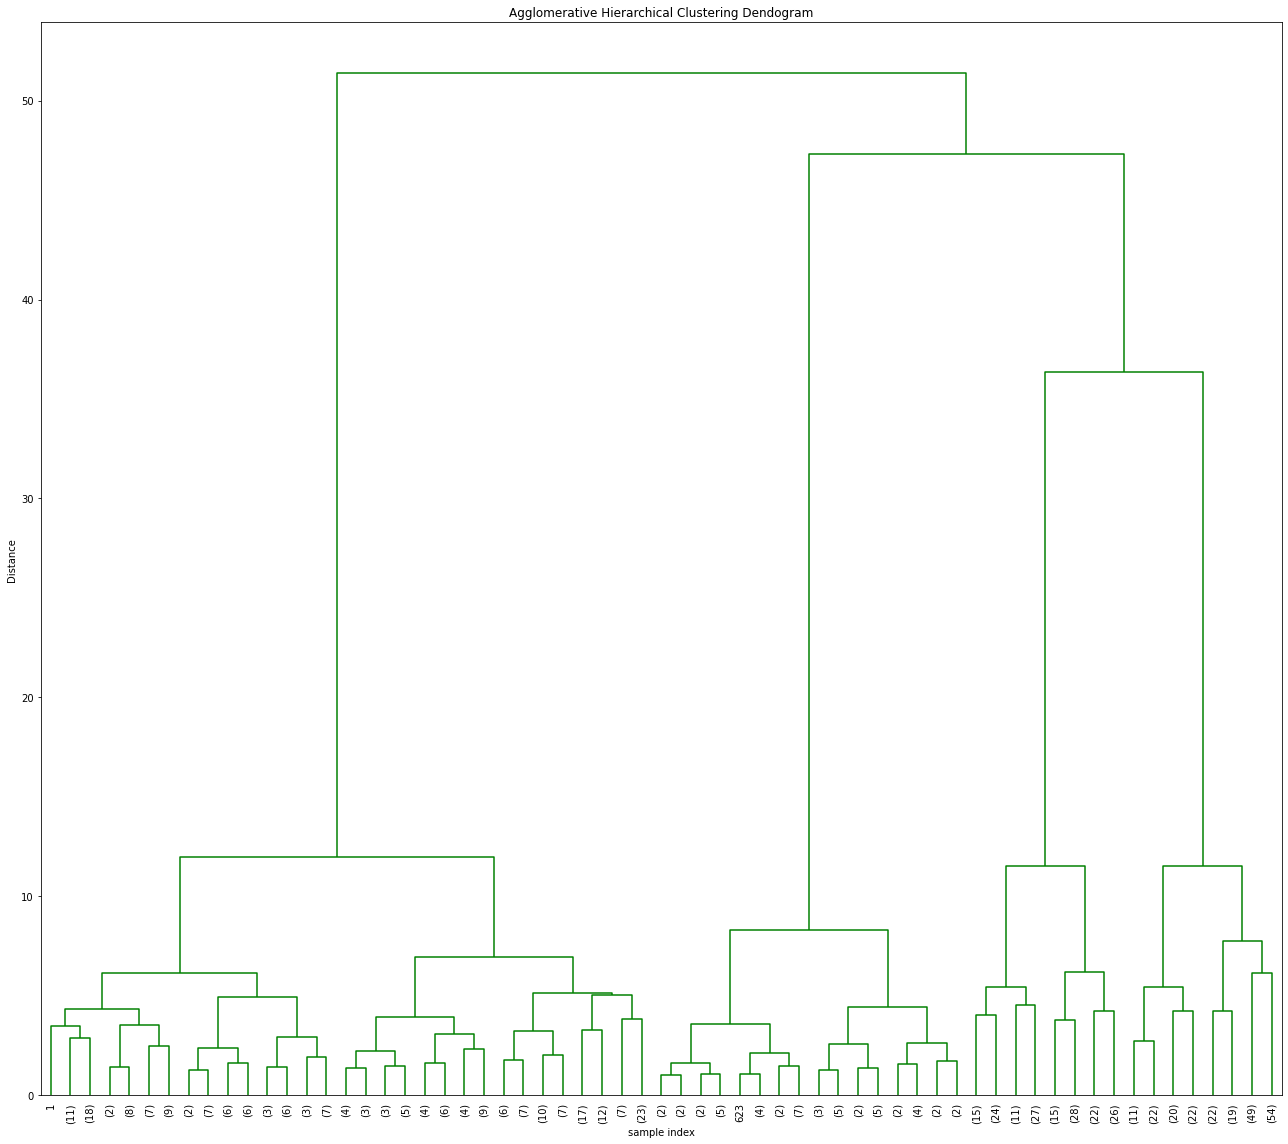

In [364]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [365]:
from scipy.cluster.hierarchy import fcluster, cophenet
c, coph_dists = cophenet(Z, pdist(X_std))

In [366]:
c

0.7706338721903119

In [367]:
from sklearn.metrics import silhouette_score
silhouette_score(X_std, clusters)

0.2834722845453821

In [368]:
# There are four key segments of customers, but they can also be divided further.

# Group 0 has moderate credit limit and credit cards, but visit banks more often while they have less activity online
# Group 1 make high calls and visit online often, but have low credit limit and credit cards
# Group 2 visit bank often with few credit cards along with low credit limit
# Group 3 has high credit cards, credit limit and online visits

# Looks like people who visit online banking have tendency to have more credit cards
# More cards means more calls, so automated services could be increased and improved upon.
# The customers who doesn't have online banking enabled, can be encouraged through advertising or some other communication about online services